# Prediction using Supervised Learning

Predict the percentage of an student based on the number of study hours.
Q) What will be predicted score if a student studies for 9.25hrs/day?

# Step 1: Import necessary libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

# Step 2: Read dataset

In [60]:
data = "http://bit.ly/w-data"
df = pd.read_csv(data)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Step 3: Sanity Check

In [61]:
# dimesion of data
df.shape

(25, 2)

In [62]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [63]:
# finding duplicates
df.duplicated().sum()

0

In [64]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [65]:
df['Scores'].value_counts()

Scores
30    3
21    1
41    1
76    1
35    1
54    1
69    1
67    1
24    1
95    1
17    1
42    1
62    1
47    1
85    1
25    1
81    1
60    1
88    1
20    1
75    1
27    1
86    1
Name: count, dtype: int64

# Step 4: Exploratory Data Analysis (EDA)

In [66]:
# describe 
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [67]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

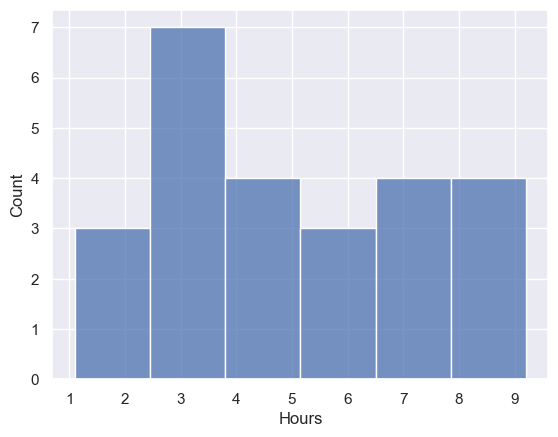

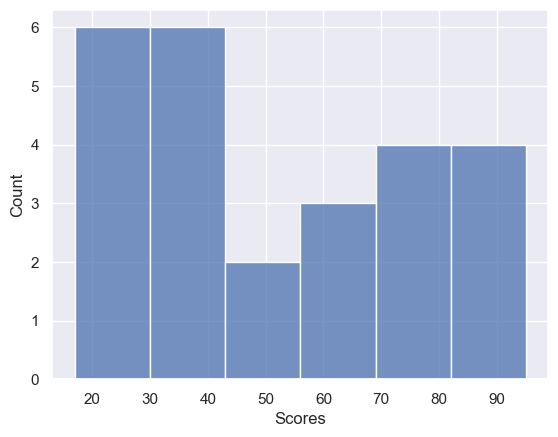

In [68]:
# histogram to understand distribtion
for i in df.select_dtypes(include = 'number').columns:
    sns.histplot(data = df, x = i)
    plt.show()

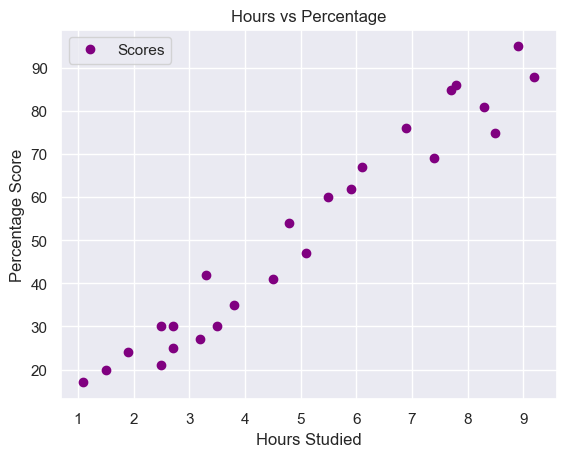

In [69]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o', c='purple')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Step 5: Data Spliting and Model Fitting 

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [35]:
# create x and y
X = df.drop('Scores', axis = 1)
Y = df['Scores']

In [38]:
X.shape

(25, 1)

In [39]:
Y.shape

(25,)

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state = 0)

In [73]:
print(X.shape, X_train.shape, X_test.shape)

(25, 1) (20, 1) (5, 1)


In [74]:
print(X_train)

    Hours
22    3.8
17    1.9
24    7.8
23    6.9
14    1.1
1     5.1
10    7.7
13    3.3
8     8.3
6     9.2
18    6.1
4     3.5
9     2.7
7     5.5
20    2.7
3     8.5
0     2.5
21    4.8
15    8.9
12    4.5


In [75]:
print(Y_train)

22    35
17    24
24    86
23    76
14    17
1     47
10    85
13    42
8     81
6     88
18    67
4     30
9     25
7     60
20    30
3     75
0     21
21    54
15    95
12    41
Name: Scores, dtype: int64


In [76]:
# model
model = LinearRegression()

In [77]:
model.fit(X_train, Y_train)

LinearRegression()

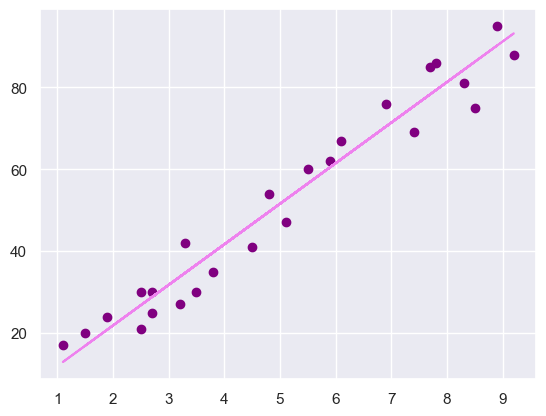

In [78]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, Y, color="purple")
plt.plot(X, line, color="violet");
plt.show()

# Step 6: Predictions

In [79]:
print(X_test)

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [80]:
Y_prediction = model.predict(X_test) # predicting score
Y_prediction

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [84]:
# Compare Actuals vs Predicted
dm = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_prediction})
dm

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


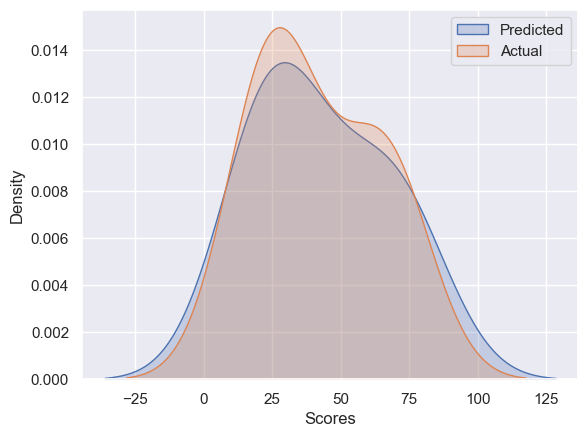

In [86]:
sns.kdeplot(Y_prediction, label="Predicted", fill=True)  # Using fill=True for filled distribution
sns.kdeplot(data=Y_test, label="Actual", fill=True)  # Using fill=True for filled distribution

# Ensure legend is displayed
plt.legend()
plt.show()

In [87]:
from sklearn.metrics import accuracy_score

In [91]:
print('Train Accuracy:', model.score(X_train, Y_train)*100,'\nTest Accuracy:', model.score(X_test, Y_test)*100)

Train Accuracy: 95.15510725211553 
Test Accuracy: 94.54906892105355


In [101]:
import warnings
warnings.filterwarnings(action="ignore")

# What will be predicted score if a student studies for 9.25 hrs/day?
hours = [9.25]

# Reshape hours into a 2D array with a single feature (column)
hours = np.array(hours).reshape(-1, 1)

ans = model.predict(hours)

# Access the individual value from hours for clearer output
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(ans[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737535
